## Import Load dataset library

This Library Helps us to load our own dataset and create X and Y data Pickels

In [132]:
import tensorflow as tf
import numpy as np
import os
import sys
import cv2
import matplotlib.pyplot as plt
import pickle
import random
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten,Conv2D,MaxPooling2D
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
DATA_DIR = "/Users/nadun/Documents/Final Year Research/Datasets/Testing Data"
CATERGORIES = ['Normal','Pyriform','Tapered','Amorphous']
IMAGE_SIZE = 131

In [134]:
def create_training_data():
    training_date = []
    for categories in CATERGORIES:
        path = os.path.join(DATA_DIR,categories)
        class_num = CATERGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMAGE_SIZE,IMAGE_SIZE))
                training_date.append([new_array,class_num])
            except:
                pass
    return training_date

In [135]:
data = np.asarray(create_training_data())

/Users/nadun/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [136]:
x_data = []
y_data = []

for x in data:
    x_data.append(x[0])
    y_data.append(x[1])

In [137]:
x_data_np = np.asarray(x_data)/255.0
y_data_np = np.asarray(y_data)

## Store Data in a Pickle file

In [138]:
pickle_out = open('x_data_np','wb')
pickle.dump(x_data_np,pickle_out)
pickle_out.close()

## Load the dataset which is ND ARRAY

In [139]:
pickle_out = open('y_data_np','wb')
pickle.dump(y_data_np,pickle_out)
pickle_out.close()

In [140]:
X_Temp = open('x_data_np','rb')
x_data_np = pickle.load(X_Temp)

Y_Temp = open('y_data_np','rb')
y_data_np = pickle.load(Y_Temp)

In [141]:
x_data_np = x_data_np.reshape(-1, 131, 131, 1)

In [142]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x_data_np, y_data_np, test_size=0.3,random_state=101)

## MODEL

In [143]:
model = Sequential()
model.add(Conv2D(150, (3, 3), input_shape=x_data_np.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(75, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_data_np, y_data_np, batch_size=32, epochs=10, validation_split=0.3)
model.save('64x3CNN.model')

Epoch 1/10
5/5 [==============================] - 5s 867ms/step - loss: 1.2164 - accuracy: 0.3907 - val_loss: -3.2472 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 4s 849ms/step - loss: 0.6249 - accuracy: 0.3775 - val_loss: -4.9576 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 4s 874ms/step - loss: 0.3496 - accuracy: 0.3775 - val_loss: -3.7299 - val_accuracy: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 4s 868ms/step - loss: 0.2378 - accuracy: 0.3775 - val_loss: -5.5545 - val_accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 4s 845ms/step - loss: 0.1875 - accuracy: 0.3775 - val_loss: -5.7627 - val_accuracy: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 4s 866ms/step - loss: 0.1510 - accuracy: 0.3775 - val_loss: -6.1071 - val_accuracy: 0.0000e+00
Epoch 7/10
5/5 [==============================] - 4s 846ms/step - loss: -0.1144 - accuracy: 0.3775 - val_loss: -8.7597 - val_accur

In [144]:
def prepare(filepath):
    training_date = []
    
    img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array,(IMAGE_SIZE,IMAGE_SIZE))
    new_image =  new_array.reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)
    return new_image

In [145]:
model = tf.keras.models.load_model('64x3CNN.model')

## Lets give a image to test from internet which network has never seen

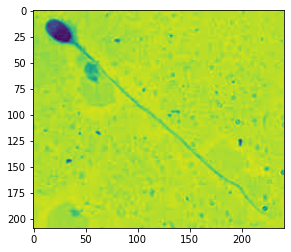

In [149]:
filepath = '/Users/nadun/Downloads/images.jpeg'
img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)

plt.imshow(img_array)

In [150]:
test = model.predict([prepare(filepath='/Users/nadun/Downloads/images.jpeg')])

In [151]:
print(CATERGORIES[int(test[0][0])])

Normal


## Results

As you can clearly see I have provided the model a Normal Sperm image from google images. The CNN clearly identify it as Normal sperm.

Used dataset to train the model: HuSHem https://data.mendeley.com/datasets/tt3yj2pf38/3

Used image from google in this notebook: https://advancedfertility.com/wp-content/uploads/sites/8/2020/09/normal-sperm.jpg